In [68]:
# Brute force method to calculate all the probabilities of two losses in a row based on number of games
import itertools
import numpy as np

# Create an array of games to iterate over. the amount of combinations is 2^n where n is the number of games played
# 2^82 is beyond computability so a curve will be created based off the first 25 games to predict the probability at game 82
games = np.linspace(1,25,25)
consecutive_losses = []
games

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.])

In [69]:
# calculate the probability of getting two losses in a row for the number of games
for value in games:
    percent = 0
    # Create all the possible combinations based on the number of games
    toss3 = map(''.join, itertools.product('WL', repeat=int(value)))
    toss3_pairs = list(itertools.product(toss3, repeat=1))
    for i in toss3_pairs:
        # check if there are atleast two losses in a row in each combination
        if 'LL' in i[0]:
            percent = percent + (0.2 ** i[0].count('L') * 0.8**(int(value) - i[0].count('L')))
    consecutive_losses.append(percent)

In [70]:
consecutive_losses

[0,
 0.04000000000000001,
 0.07200000000000002,
 0.10400000000000005,
 0.13472000000000006,
 0.164416,
 0.19308799999999998,
 0.2207769599999998,
 0.24751564800000053,
 0.27333683200000153,
 0.29827196927999955,
 0.32235146854400865,
 0.34560468992000665,
 0.3680599869030047,
 0.3897447399097213,
 0.41068538983228836,
 0.43090747025085435,
 0.45043563857313085,
 0.4692937060989997,
 0.487504667050909,
 0.5050907266065999,
 0.5220733280115881,
 0.5384731786877988,
 0.5543102753989403,
 0.5696039288587443]

In [71]:
# we are aware that eventually as n-> infinity, the probability of consecutive losses has to -> 1
# hard code a big number of games value with corresponding probability value of 1
game = list(games)
game.append(1000.)
consecutive_losses.append(1)

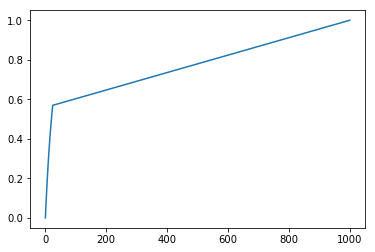

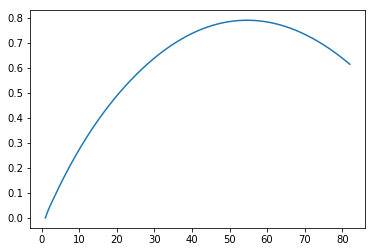

In [73]:
plt.plot(game,consecutive_losses, '-')
plt.show()

from scipy.interpolate import spline

xnew = np.linspace(1,82,1000) #300 represents number of points to make between T.min and T.max

power_smooth = spline(game,consecutive_losses,xnew)

plt.plot(xnew,power_smooth)
plt.show()

In [ ]:
#Using the curve, we can estimate that at game 82 the probability will be around 80%